# K-means implementation

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scipy

     |████████████████████████████████| 10.3 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 80.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 19.7 MB/s eta 0:00:01


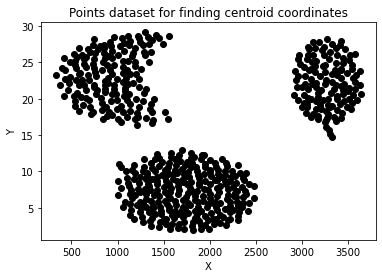

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

dataset = pd.read_table("cluster.dat", sep=" ", header=None)
X = dataset.iloc[:, 0:1].values
Y = dataset.iloc[:, 1:2].values

plt.scatter(X, Y, label = "Point (X;Y)", color = 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Points dataset for finding centroid coordinates")
plt.show()

In [ ]:
def inicializaCentroides(k, data):
    centroides = []
    for i in range(0,k):
        centroides.append(data.loc[[i]])
    return centroides

def calculaDistancia(ponto1, ponto2):
    #print('ponto1')
    #print(ponto1.to_numpy())
    ponto1 = ponto1.to_numpy()
    ponto2 = ponto2.to_numpy()[0]
    # distancia euclidiana
    return distance.euclidean(ponto1, ponto2)

def encontraCentroideMaisProximo(ponto, centroides, k):
    isFirst = True
    centroide = 0
    menorDistancia = -1
    for i in range(0,len(centroides)):
        # calcula distancia pra cada centroide
        dist = calculaDistancia(ponto, centroides[i])
        if (isFirst):
            menorDistancia = dist
            isFirst = False
        elif (dist < menorDistancia):
            menorDistancia = dist
            centroide = i
    return centroide

def populaClusters(centroides, data, k):
    clusters = []
    for i in range(0,k):
        clusters.append([])
    for index, i in data.iterrows():
        
        centroide = encontraCentroideMaisProximo(i, centroides, k)
        # Passo 3: Coloca cada ponto nas classes que está mais próximo
        clusters[centroide].append(i.to_numpy())
    return clusters

def recalculaCentroides(k, centroides, clusters):
    for i in range(0,k):
        mediax=0
        mediay=0
        print('antes: ', centroides[i])
        tam_cluster=len(clusters[i])
        for j in range(0, tam_cluster):
            mediax+=clusters[i][j][0]
            mediay+=clusters[i][j][1]
        mediax = mediax/tam_cluster
        mediay = mediay/tam_cluster
        centroides[i][0] = mediax
        centroides[i][1] = mediay
        print('dps: ', centroides[i])
        
def loop_kmeans(centroides, data, k):
    clusters = populaClusters(centroides, data, k)
    centroidesAntes = centroides
    centroides = recalculaCentroides(k, centroides, clusters)
    return centroidesAntes, centroides, clusters
        
def convergiu(centroidesAntes, centroidesDepois, k):
    mudou = False
    for i in range(0,k):
        if(centroidesAntes[i] == centroidesDepois[i])
        mudou = True
    return mudou
        
def kmeans(k, data):
    # Passo 1: Fornece valores iniciais para os centroides e agrupa
    #         o restante dos dados em um centroide
    centroides = inicializaCentroides(k, data)
    
    # Passo 2: Calcula distancia entre cada ponto e os centroides (passo 3 dentro de 'inicializaClusters')
    clusters = populaClusters(centroides, data, k)
    
    # Passo 4: Calcula os novos centroides para cada classe com a média
    centroidesAntes = centroides
    centroides = recalculaCentroides(k, centroides, clusters)
    mudou = False
    # Passo 5: Repete o passo 2 em diante até convergir
    while(convergiu(centroidesAntes, centroides)==False):
        centroidesAntes, centroides, clusters = loop_kmeans(centroides, data, k)
        print(convergiu(centroidesAntes, centroides))
    
    return clusters
    
    
clusters = kmeans(3, dataset)
